In [ ]:
# Basic Imports & Dataset Download


import pandas as pd

# Load data
file_path = "/home/surendran/rag_local/data/breast-cancer-wisconsin-data.csv"
df = pd.read_csv(file_path)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt





In [ ]:
## Review numbers on variability  - Explained variance & cumulative variance


# Features and target
X = df.iloc[:, 2:32]
y = df.iloc[:, 1].map({"M": 1, "B": 0})

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# PCA (full spectrum first)
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)

# explained variance
explained_variance = pca.explained_variance_ratio_
explained_variance

array([4.45935222e-01, 1.85452555e-01, 9.58464121e-02, 6.59376825e-02,
       5.62228616e-02, 3.98848772e-02, 2.21449317e-02, 1.61400564e-02,
       1.28478896e-02, 1.16566138e-02, 1.00835994e-02, 9.05534747e-03,
       7.92635285e-03, 4.79482101e-03, 3.04107016e-03, 2.51299401e-03,
       1.97524871e-03, 1.74413404e-03, 1.57346560e-03, 1.05152270e-03,
       9.95539341e-04, 7.95814888e-04, 7.84034550e-04, 5.31246275e-04,
       5.11862282e-04, 2.64113057e-04, 2.09992404e-04, 5.03306942e-05,
       2.52827614e-05, 4.12638742e-06])

In [ ]:
#cumulative_variance

array([0.44593522, 0.63138778, 0.72723419, 0.79317187, 0.84939473,
       0.88927961, 0.91142454, 0.9275646 , 0.94041249, 0.9520691 ,
       0.9621527 , 0.97120805, 0.9791344 , 0.98392922, 0.98697029,
       0.98948329, 0.99145854, 0.99320267, 0.99477613, 0.99582766,
       0.9968232 , 0.99761901, 0.99840305, 0.99893429, 0.99944615,
       0.99971027, 0.99992026, 0.99997059, 0.99999587, 1.        ])

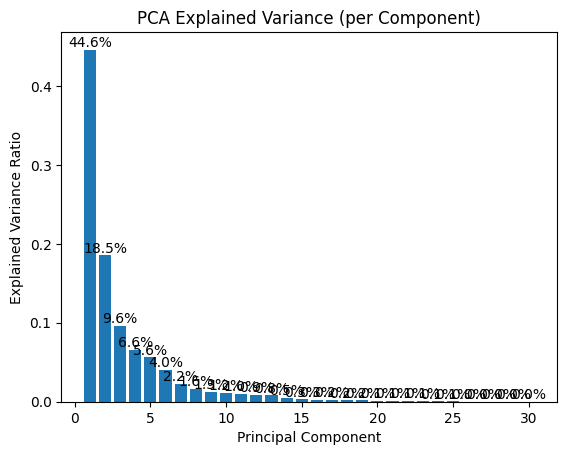

In [13]:
# PCA chart

plt.figure()
bars = plt.bar(
    range(1, len(explained_variance) + 1),
    explained_variance
)

plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("PCA Explained Variance (per Component)")

# annotate percentages
for i, v in enumerate(explained_variance):
    plt.text(i + 1, v, f"{v*100:.1f}%", ha='center', va='bottom')

plt.show()



PCA components: 4 | Test Accuracy: 0.9737
PCA components: 8 | Test Accuracy: 0.9825
PCA components: 10 | Test Accuracy: 0.9737


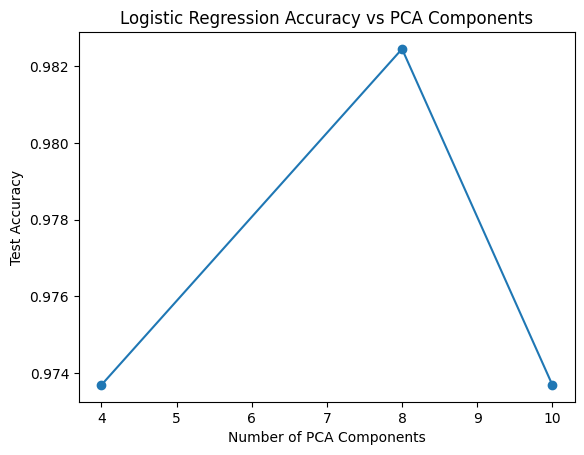

In [14]:
# Optimizing the PCA - to cover maximum variations in data


from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

pca_components = [4, 8, 10]
accuracies = []

for n in pca_components:
    pca = PCA(n_components=n)
    
    X_train_pca_n = pca.fit_transform(X_train_scaled)
    X_test_pca_n  = pca.transform(X_test_scaled)
    
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_pca_n, y_train)
    
    y_pred = model.predict(X_test_pca_n)
    acc = accuracy_score(y_test, y_pred)
    
    accuracies.append(acc)
    
    print(f"PCA components: {n} | Test Accuracy: {acc:.4f}")
import matplotlib.pyplot as plt

plt.figure()
plt.plot(pca_components, accuracies, marker='o')
plt.xlabel("Number of PCA Components")
plt.ylabel("Test Accuracy")
plt.title("Logistic Regression Accuracy vs PCA Components")
plt.show()


[[71  1]
 [ 1 41]]


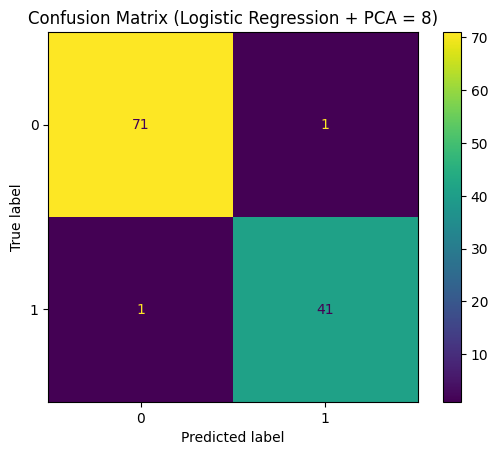

In [15]:

# Proceed with PCA + Logistic Regression based on optimized PCA (count 8)

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# PCA with 8 components
pca = PCA(n_components=8)
X_train_pca_8 = pca.fit_transform(X_train_scaled)
X_test_pca_8  = pca.transform(X_test_scaled)

# Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca_8, y_train)

# Predictions
y_pred_8 = model.predict(X_test_pca_8)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_8)
print(cm)

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix (Logistic Regression + PCA = 8)")
plt.show()


[[71  1]
 [ 1 41]]


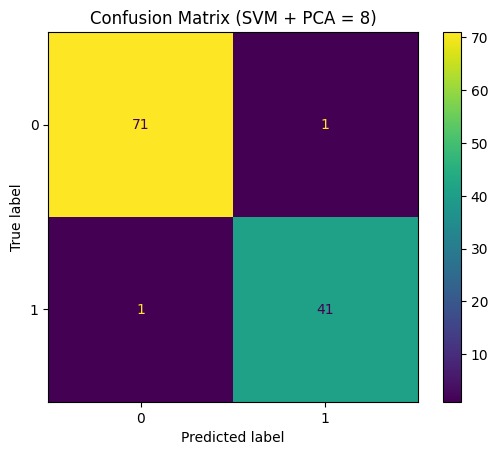

In [16]:
# Proceed with PCA +  SVC  based on optimized PCA (count 8)


from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# PCA with 8 components
pca = PCA(n_components=8)
X_train_pca_8 = pca.fit_transform(X_train_scaled)
X_test_pca_8  = pca.transform(X_test_scaled)

# SVM (linear, to match earlier comparison)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_pca_8, y_train)

# Predictions
y_pred_svm_8 = svm_model.predict(X_test_pca_8)

# Confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm_8)
print(cm_svm)

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp.plot()
plt.title("Confusion Matrix (SVM + PCA = 8)")
plt.show()


In [ ]:
# Accuracy metrics for optimized PCA + SVM 

from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# PCA with 8 components (CORRECT order)
pca = PCA(n_components=8)
X_train_pca_8 = pca.fit_transform(X_train_scaled)
X_test_pca_8  = pca.transform(X_test_scaled)

# SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_pca_8, y_train)

# Predictions
y_pred_correct = svm_model.predict(X_test_pca_8)

# Accuracy
acc_correct = accuracy_score(y_test, y_pred_correct)
print(f"Test Accuracy with correct split order: {acc_correct:.4f}")

Test Accuracy with correct split order: 0.9825
